# Milestone 2
Group 29: Selena Kang, Andrew Xiao, Maria Silaban, Toshi Tokuyama

From milestone 1, we came up with the following questions to help analyze the data:
* How do popular videos compare in terms of the number of likes, dislikes, and comments?
* Are views affected by the time of year?
* Do videos with more tags get more comments?
* Are the videos trending on a particular day a dependent variable of what videos trended on previous days? If so, in what way?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from patsy import dmatrices
plt.style.use('seaborn')

In [2]:
us_data = pd.read_csv('USvideos_updated.csv')

### Question 1

We noticed in the visualization of Question 1 that the number of comments seemed to differ from the number of views. It seemed like even though a video would get a significant number of views, the number of comments never seemed to match that same intensity even though they would generally increase with an increasing number of views. We decided to explore this using a linear regression. 

In [11]:
Y,X = dmatrices("comment_count ~ views", data=us_data, return_type='dataframe')
model_q1 = sm.OLS(Y,X).fit()
model_q1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          comment_count   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                 2.525e+04
Date:                Tue, 12 May 2020   Prob (F-statistic):               0.00
Time:                        15:02:43   Log-Likelihood:            -4.7947e+05
No. Observations:               40949   AIC:                         9.589e+05
Df Residuals:                   40947   BIC:                         9.590e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1065.7568    152.712      6.979      0.000     766.438    1365.076
views          0.0031   1.97e-05    158.909      0.000       0.003       0.003
==============================================================================
Omnibus:                    89595.172   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        666854771.525
Skew:                          19.919   Prob(JB):                         0.00
Kurtosis:                     626.901   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The linear regression equation is: views = 0.003*(comment_count) + 1065. 

From these plots we can analyze the linear regression assumptions. 

1. The two variables views and comment count are not mutually independent because from the plot of comment count vs views and the linear regression, there does seem to be a general increase of views as the number of comment count increases. 
2. The two variables are not independent of the covariates. 
3. From the QQ plot we can see that the plots are are not lying on the line so the data is not normally distributed.  
4. From the plot of the absolute value of the residual vs the comment count we see that the variance in the data increases as the comment count increases. Therefore this data does not have constant variance. We can also see this displayed in the residual vs the comment count as this plot shows the same trend. 

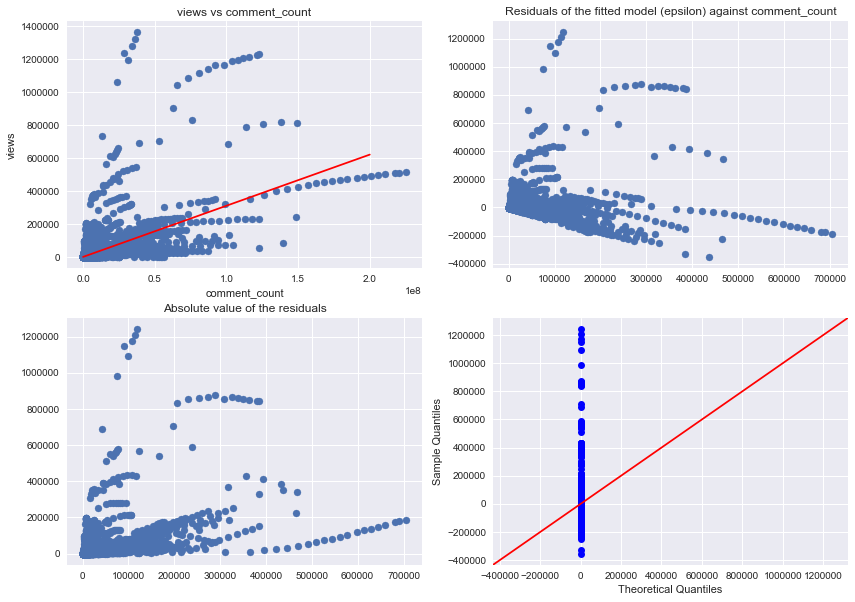

In [14]:
fig = plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.xlabel("comment_count")
plt.ylabel("views")
plt.title("views vs comment_count")
plt.scatter(us_data['views'],us_data['comment_count']) 
x = np.linspace(0,200000000)
y = 0.0031*x + 1065
plt.plot(x,y,'red')

plt.subplot(2,2,2)
plt.title("Residuals of the fitted model (epsilon) against comment_count")
plt.scatter(model_q1.predict(X),model_q1.resid)

plt.subplot(2,2,3)
plt.title("Absolute value of the residuals")
plt.scatter(model_q1.predict(X), abs(model_q1.resid)) 

sm.qqplot(model_q1.resid, line='45', ax = plt.subplot(2, 2, 4))
plt.show()

In conclusion, this shows that the relationship between the comment count and the views is generally unpredictable as it varies a lot within the data set we analyzed. This relates to what was displayed in the visualization as the comment count was the value that varied most amongst the top 10 videos whereas likes and dislikes were generally the same (a significant amount of likes and very little dislikes). 

### Question 2

### Question 3
To address the question of whether videos with more tags get more comments we will conduct linear regression analysis and see the relationship between the two variables.

Since a column that measures the amount of tags on a video is not included in the data, we created a column that measures such value.

In [5]:
comment_enabled = us_data[us_data['comments_disabled'] == False] # removes videos that have comments disabled

In [6]:
Y, X = dmatrices('np.log(comment_count+1) ~ tag_count', data=comment_enabled, return_type='dataframe')
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(comment_count + 1)   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     298.0
Date:                       Tue, 12 May 2020   Prob (F-statistic):           1.57e-66
Time:                               15:02:22   Log-Likelihood:                -81723.
No. Observations:                      40228   AIC:                         1.635e+05
Df Residuals:                          40226   BIC:                         1.635e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2423      0.018    410.162      0.000       7.208       7.277
tag_count      0.0132      0.001     17.262      0.000       0.012       0.015
==============================================================================
Omnibus:                     2347.688   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4041.217
Skew:                          -0.461   Prob(JB):                         0.00
Kurtosis:                       4.249   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary output the linear regression equation becomes $log(\text{Comment count} + 1) = 0.0132(\text{Tag Count}) + 7.2420$. The regression equation shows that the variables are statistically significant, and the $R^2 = 0.007$

Now we check to see if the assumptions of a linear regression are satsified.

In [7]:
influence = model.get_influence()
standarized_residual = influence.resid_studentized_internal

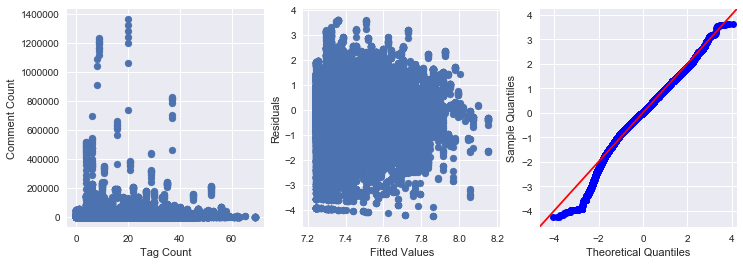

In [8]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.scatter(comment_enabled['tag_count'], comment_enabled['comment_count'])
plt.xlabel('Tag Count')
plt.ylabel('Comment Count')

plt.subplot(1,3,2)
plt.scatter(model.predict(X), standarized_residual)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

ax = plt.subplot(1, 3, 3)
sm.qqplot(standarized_residual, fit = True, line='45', ax = ax)
plt.show()

The scatter plot (left plot) shows no apparent linear relationship between the amount of comments and tags attached to the video. The residual plot (middle plot) shows constant error variance but the points seems to be cluttered more in the range of 7.2~7.9. The qqPlot (right plot) shows that all points are not aligned around the line $y=x$. Since there are overlapping videos in the data, we can not assume that the data are independent. Therfore, the assumptions of linear regression are not satisfied.

We conclude that there is no relationship between comment count and tag_count.

# Question 4